<a href="https://colab.research.google.com/github/cho52o/statistical_theory2020/blob/main/%ED%86%B5%EA%B3%84%ED%95%99%EC%9B%90%EB%A1%A0_%EB%B0%95%EC%B4%88%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 06.15.월

In [ ]:
import scipy.stats as st
x = st.chi2.rvs(5,0,1,10)

95% 신뢰구간 구하기

In [ ]:
Upper = x.mean() + st.norm.ppf(0.975)*x.std()/(x.shape[0])**0.5
Lower = x.mean() - st.norm.ppf(0.975)*x.std()/(x.shape[0])**0.5
print('하한 =', Lower,'상한 =', Upper)

하한 = 3.418528556899319 상한 = 7.286628387145586


통계적 가설

> 귀무가설 : 모집단 평균은 5이다.
> 대립가설 : 평균은 5가 아니다.

모평균 점추정량?

In [ ]:
x.mean()

5.3525784720224525

검정통계량?

> TS = (표본평균 - 귀무가설 설정평균) / (s/sqrt(n))

In [ ]:
ts = abs((x.mean()-5)/(x.std()/x.shape[0]**0.5))
(1-st.norm.cdf(ts))*2 # 유의수준 = p-value

0.7208652668614808

유의수준과 유의확률 비교

문제

전국 흡연율이 28%이다. 기독교 학교인 우리 대학은 전국 흡연율보다 낮다고 주장한다. 그래서 이주장이 맞는지 알아보기 위하여 한남대생 100명을 무작위로 선택하여 흡연 여부를 물었더니 19명이 흡연하다고 했다. 한남대학교 학생 흡연율의 추정치를 구하고 한남대 주장을 검정하시오.

19/100 흡연율의 점추정치
> 귀무가설 : 한남대생 흡연율=28%이다.
> 대립가설 : 한남대생 흡연율<28%이다.

In [ ]:
x = st.norm.rvs(25,19,100)

In [ ]:
ts = abs((x.mean()-28)/(x.std()/x.shape[0]**0.5))
1-st.norm.cdf(ts) # 유의수준 = p-value

0.3019680804588356

In [ ]:
phat = 19/100
ts = (phat-0.25)/(0.25*0.75/100)**0.5

In [ ]:
1-st.norm.cdf(abs(ts)) # 유의수준 = p-value

0.08292833017145496

유의수준 10%에서는 그들의 주장이 맞다. 그러나 5%에서는 그들의 주장이 맞지 않다.

### 06.08.월

정규분포 N(평균=50,표준편차=10)을 따르는 데이터 30개 난수 생성하고 data에 저장하시오.

In [ ]:
import scipy.stats as st
data = st.norm.rvs(50,10,30)

1) 모집단의 평균을 모수라 할 때 모수의 점추정량을 구하시오.

In [ ]:
data.mean()

52.038986512535075

2) 모수 = 모집단 분산일 때 모수의 점추정량을 구하시오.

In [ ]:
data.var()

118.87634246930821

3) 모수 = 60점 이상인 학생의 비율에 대한 점추정량을 구하시오.

In [ ]:
sum(data >= 60)/30

0.26666666666666666

신뢰구간 구하기:학생들의 중간고사 평균 신뢰구간 구하기

In [ ]:
st.norm.ppf(0.025,50,data.std()/30**0.5)

46.09846793190769

In [ ]:
st.norm.ppf(0.975,50,data.std()/30**0.5)

53.90153206809231

In [ ]:
print('95%% 신뢰구간 하한=%.1f, 상한=%.1f' %(st.norm.ppf(0.025,50,data.std()/30**0.5),st.norm.ppf(0.975,50,data.std()/30**0.5)))

95% 신뢰구간 하한=46.1, 상한=53.9


모집단 분산 95% 신뢰구간 구하기

In [ ]:
30*data.var()/0.025

142651.61096316986

In [ ]:
30*data.var()/0.975

3657.733614440253

In [ ]:
print('95%% 신뢰구간 하한=%.1f, 상한=%.1f' %(30*data.var()/st.chi2.ppf(0.975,29),30*data.var()/st.chi2.ppf(0.025,29)))

95% 신뢰구간 하한=78.0, 상한=222.2


### 숙제

> 학번 뒷자리
* 정규분포(0,1) : 0,1,2,3
* 균일분포(1,2) : 4,5,6
* 지수분포(스케일=0.5) : 7,8,9

In [ ]:
import pandas as pd
import scipy.stats as st
df = pd.DataFrame(columns=['x'])
for i in range(0,1000):
    df=df.append({'x': st.norm.rvs(0,1,2).mean()}, ignore_index=True)
df.mean()

x    0.033991
dtype: float64

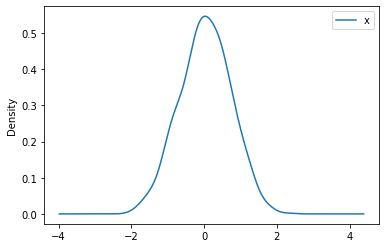

In [ ]:
df2=df.astype(float)
import matplotlib.pyplot as plt
pd.DataFrame(df2).plot.kde(bw_method=0.3)

In [ ]:
import pandas as pd
df = pd.DataFrame(columns=['x'])
for i in range(0,1000):
    df=df.append({'x': st.norm.rvs(0,1,5).mean()}, ignore_index=True)
df.mean()

x   -0.002836
dtype: float64

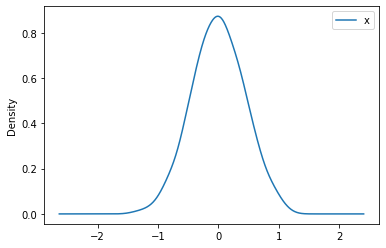

In [ ]:
df5=df.astype(float)
pd.DataFrame(df5).plot.kde(bw_method=0.3)

In [ ]:
import pandas as pd
df = pd.DataFrame(columns=['x'])
for i in range(0,1000):
    df=df.append({'x': st.norm.rvs(0,1,30).mean()}, ignore_index=True)
df.mean()

x   -0.000734
dtype: float64

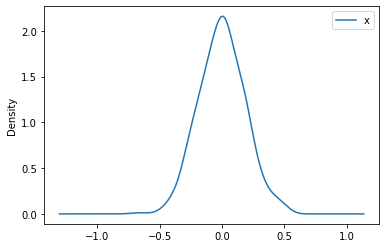

In [ ]:
df30=df.astype(float)
pd.DataFrame(df30).plot.kde(bw_method=0.3)

### 06.03.수

In [ ]:
import pandas as pd
df = pd.DataFrame(columns=['x'])
for i in range(0,5):
    df=df.append({'x': i}, ignore_index=True)
df

,x
0,0
1,1
2,2
3,3
4,4


In [ ]:
import scipy.stats as st
st.uniform.rvs(0,1,1)

array([0.71796305])

In [ ]:
import pandas as pd
df = pd.DataFrame(columns=['x'])
for i in range(0,1000):
    df=df.append({'x': st.uniform.rvs(0,1,1)}, ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


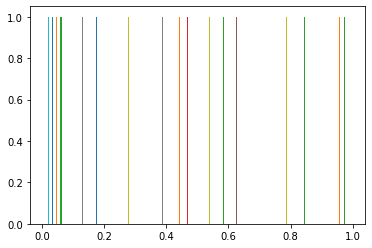

In [ ]:
df0=df.astype(float)
import matplotlib.pyplot as plt
plt.hist(df0)
plt.show()

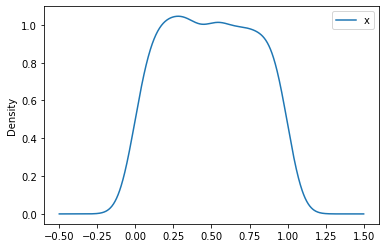

In [ ]:
pd.DataFrame(df0).plot.kde(bw_method=0.3)

In [ ]:
st.uniform.rvs(0,1,2).mean()

0.5011547134997703

In [ ]:
df = pd.DataFrame(columns=['x'])
for i in range(0,1000):
    df=df.append({'x': st.uniform.rvs(0,1,20).mean()}, ignore_index=True)
df

,x
0,0.426815
1,0.525462
2,0.412771
3,0.513381
4,0.458673
...,...
995,0.506852
996,0.398813
997,0.532819
998,0.469118


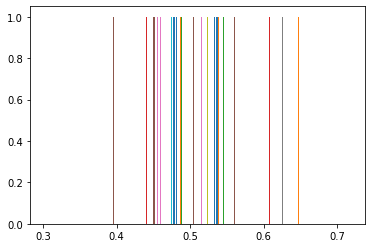

In [ ]:
df0=df.astype(float)
import matplotlib.pyplot as plt
plt.hist(df0,bins=10)
plt.show()

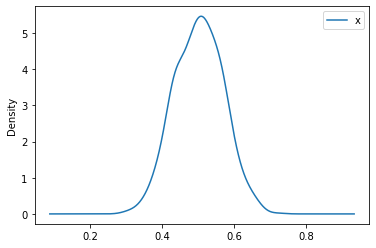

In [ ]:
pd.DataFrame(df0).plot.kde(bw_method=0.3)

In [ ]:
import pandas as pd
df = pd.DataFrame(columns=['x'])
for i in range(0,100):
    df=df.append({'x': st.gamma.rvs(1,0,2,2).mean()}, ignore_index=True)
df.mean()

x    2.013401
dtype: float64

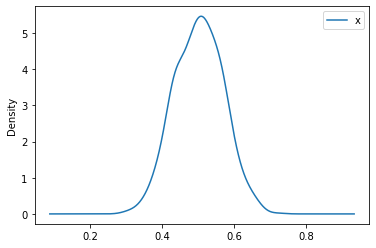

In [ ]:
pd.DataFrame(df0).plot.kde(bw_method=0.3)

### 06.01.월

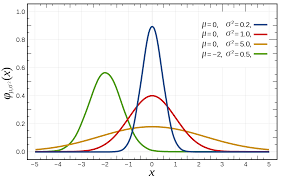

In [ ]:
import scipy.stats as st
import numpy as np
x = np.arange(4,22,0.1)
fx = st.norm.pdf(x,13,3)

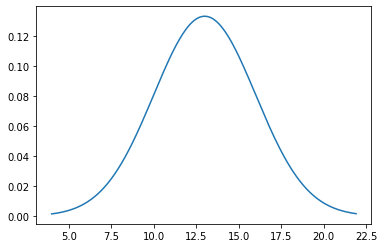

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,fx)
plt.show()

N(13,3)으로부터 확률표본 200개를 추출하시오.

In [ ]:
sample = st.norm.rvs(13,3,200)
print('표본평균 = %.2f, 표본표준편차 = %.3f' %(sample.mean(), sample.std()))

표본평균 = 13.02, 표본표준편차 = 3.153


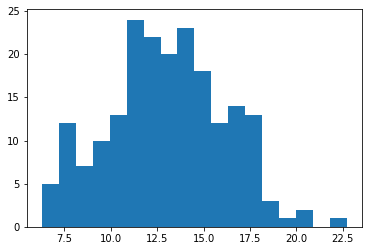

In [ ]:
plt.hist(sample, bins=18)
plt.show()

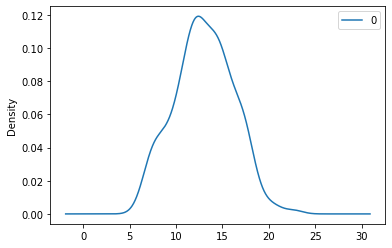

In [ ]:
import pandas as pd
pd.DataFrame(sample).plot.kde(bw_method=0.3)

Mission
> 알파 =1, 베타(쎄타)=1/scale=0.5인 감마분포로부터 표본크기 100인 확률표본의 평균과 표준편차를 출력하고 KDE 분포함수를 그리시오.

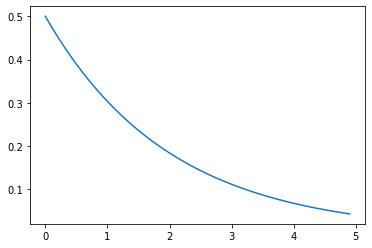

In [ ]:
import scipy.stats as st
import numpy as np
x = np.arange(0,5,0.1)
fx = st.gamma.pdf(x,1,0,2)
import matplotlib.pyplot as plt
plt.plot(x,fx)
plt.show()

In [ ]:
sample = st.gamma.rvs(1,0,0.5,100)
print('표본평균 = %.2f, 표본표준편차 = %.3f' %(sample.mean(), sample.std()))

표본평균 = 0.46, 표본표준편차 = 0.492


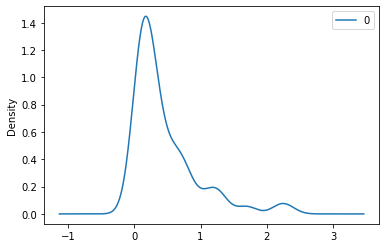

In [ ]:
import pandas as pd
pd.DataFrame(sample).plot.kde(bw_method=0.3)

### 05.25.월

#### 균일분포 Uniform Distribution X ∼ U(a, b)

In [ ]:
import scipy.stats as st
st.uniform.rvs(0,1,10000000).mean()

0.4999387806891556

만약 낙하산이 marker 0(A)과 10m(B) 사이에 임의의 지점에 떨어진다고 하자.

(1)낙하산이 B 보다 A 지점에 더 가까이 떨어질 확률을 구하시오.

(2)낙하산 떨어진 지점에서 지점 A까지의 거리가 지점 B까지의 거리의 3배 이상일 확률을 구하시오.

(3)3개의 낙하산 중 정확하게 한 개만 지점 B에 가까이 떨어질 확률을 구하시오.

In [ ]:
#1 1-st.uniform.cdf(5,0,10)
#2 1-st.uniform.cdf(7.5,0,10)
st.binom.pmf(1,3,0.5)

0.375

#### 지수분포 Exponential Distribution X ∼ Exp(θ = 1/λ)


난수를 이용하여 지수분포를 따르는 확률변수 생성이 가능 -> 지수분포를 이용하여 모든 연속형 확률변
수 생성이 가능하다.

(1) Y ∼ U(0,1) 난수를 생성한다. 100개를 생성한다.

In [ ]:
y = st.uniform.rvs(0,1,100)

(array([ 9., 15.,  8., 12.,  8.,  8., 10.,  9.,  8., 13.]),
 array([0.01238252, 0.11113142, 0.20988032, 0.30862922, 0.40737812,
        0.50612702, 0.60487592, 0.70362482, 0.80237372, 0.90112262,
        0.99987152]),
 <a list of 10 Patch objects>)

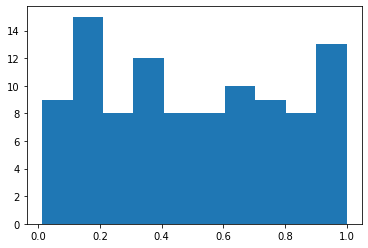

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y,bins=10)

In [ ]:
y.mean()

0.5006937981085156

 (2) F(x) = 1 − e^−x = Y (3) 이를 확률변수
X에 대하여 풀면 X = − ln(1 − Y), 이는 지수분포(λ = 1) 생성할 수 있다.

In [ ]:
import numpy as np
x = -3*np.log(1-y)

(array([60., 21.,  6.,  4.,  5.,  2.,  0.,  1.,  0.,  1.]),
 array([ 0.03737947,  2.72155189,  5.4057243 ,  8.08989672, 10.77406914,
        13.45824155, 16.14241397, 18.82658639, 21.5107588 , 24.19493122,
        26.87910364]),
 <a list of 10 Patch objects>)

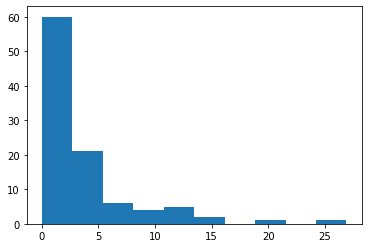

In [ ]:
plt.hist(x)

In [ ]:
x.mean()

3.5508489117130977

#### 감마분포 Gamma Distribution X ∼ Gamma(α, β = 1/λ)


scale papameter = 0.5인 지수분포 100개 생성

In [ ]:
st.expon.rvs(0,0.5,100).mean()

0.4042095362445752

감마분포(alpha=3, beta=0.59)를  따르는 확률변수 100개를 생성하시오.

In [ ]:
y = st.expon.rvs(0,0.5,100)+st.expon.rvs(0,0.5,100)+st.expon.rvs(0,0.5,100)
y.mean()

1.4974858005658422

In [ ]:
st.gamma.rvs(3,0,0.5,100).mean()

1.3904452108665126

은행 고객이 ATM 머신을 방문 회수는 5분당 2명이다.

9시에 첫 고객이 ATM 머신을 방문하였다. 다음 고객이 9시 3분 이후에 올 확률을 구하시오.

x = 고객이 오는데 걸리는 시간
λ = 2/5
P(x>=3|x_exp(deta=1/(2/5))

In [ ]:
1 - st.gamma.cdf(3,1,0,5/2)

0.3011942119122021

은행 고객이 ATM 머신을 방문 회수는 5분당 2명이다.

9시에 첫 고객이 ATM 머신을 방문하였다. 세번째 고객이 9시 5분 이내에 올 확률을 구하시오.

In [ ]:
st.gamma.cdf(5,2,0,5/2)

0.5939941502901616

### 05.20.수

이항분포와 포아송 분포 관계

> 우리 대학에서 헌혈 가능자가 10%이다. 500명을 임의 추출하였을 때 120명 이상이 헌혈 가능자일 확률을 구하시오.

In [ ]:
import scipy.stats as st

In [ ]:
1 - st.binom.cdf(59,500,0.1)

0.08098716222702684

In [ ]:
1 - st.poisson.cdf(59,50)

0.09226505195893298

### 05.18.월

초원에 서식하는 얼룩말의 수는 1 Acre 당 평균 5마리이고 포아송 분포를 따른다고 하자. 10 Acre를 무작위 조사하였을 때 얼룩말을 하나도 보지 못할 확률은?


P(X=0|X_poisson(lamda=50))

In [ ]:
import scipy.stats as st
st.poisson.pmf(1,25)

3.471985966241e-10

5 Acre를 무작위 조사하였을 때 얼룩말을 둘 이상 보지 못할 확률은?

P(X>=2|X_poisson(lamda=25))
P(X>=1|X_poisson(lamda=25)) = 1-P(X<=1|X_poisson(lamda=25)

In [ ]:
1-st.poisson.cdf(1,25)

0.9999999996389135

지리산에 멧돼지가 10마리 있다. 그리고 새로운 멧돼지 3마리에 표식하여 놓아주었다. 그리고 일정한 기간이 지난 후 3마리를 잡았을 때 표식이 있는 멧되지가 1마리 잡힐 확률을 구하시오.

P(X=1|HG(M=13,n=3,N=3))

In [ ]:
st.hypergeom.pmf(1,13,3,3)

0.4720279720279718

초원에 서식하는 얼룩말 수(N)를 추정하려고 한다. M마리 얼룩말을 잡아 표식을 붙이고 놓아 주었다. 일정 기간이 지난 후 n마리 얼룩말을 잡아 표식 여부를 확인하였다. n마리 중 표식이 있는 얼룩말의 수를 확률변수라 정의하자. 그리고 M=4, n=3이라 가정하자.

(1) P(X = 1) 일 확률을 구하시오.

(2)을 최대화 하는 모집단 얼룩말 수 N을 추정하시오.

P(X=1|HG(M=N+4,n=3,N))

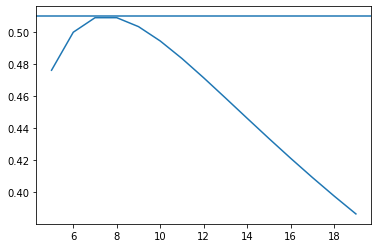

In [ ]:
import numpy as np
N=np.arange(5,20)
p=st.hypergeom.pmf(1,N+4,4,3)
plt.axhline(0.51)
plt.plot(N,p)

7, 8마리

M=10, n=10

(1) P(X = 2) 일 확률을 구하시오.

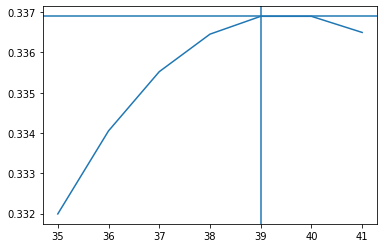

In [ ]:
import numpy as np
N=np.arange(35,42)
p=st.hypergeom.pmf(2,N+10,10,10)
plt.axvline(39)
plt.axhline(0.3369)
plt.plot(N,p)

In [ ]:
p

array([0.33199051, 0.33405256, 0.33552308, 0.33645509, 0.33689808,
       0.33689808, 0.33649773])

39, 40마리

### 숙제

In [ ]:
import scipy.stats as st

은행에 고객이 임의의 1초에 창구를 찾을 확률은 0.1이고 고객이 창구를 찾는 사건은 서로 독립이라고 가정하자. 

①3초에 첫 손님이 올 확률을 계산하시오. 
P(X=2|X~NB(r=1,p=0.1))

In [ ]:
st.nbinom.pmf(2,1,0.1)

0.08100000000000002

②적어도 3초 안에는 첫 손님이 오지 않을 확률을 계산하시오. 
1-P(X>=3|X~NB(r=1,p=0.1))

In [ ]:
1-st.nbinom.cdf(0,3,0.1)

0.999

③첫 손님이 오려면 몇 초나 기다려야 할까?
r/p = 1/0.1 = 10 (기댓값)

지질학 연구 결과 석유 탐사 중 석유 발견 확률은 0.2이다. 

①3번째 탐사에서 처음 석유가 발견될 확률을 계산하시오. 
P(X=2|X~NB(r=1,p=0.2))

In [ ]:
st.nbinom.pmf(2,1,0.2)

0.128

②7번째 탐사에서 3번째 석유가 발견될 확률을 계산하시오. 

In [ ]:
st.nbinom.pmf(4,3,0.2)

0.049152000000000015

P(X>=5|X_NB(n=2,p=0.2)) = 1-P(X<=4|X_NB(n=2,p=0.2))

In [ ]:
1-st.nbinom.cdf(4,2,0.2)

0.6553599999999999

③석유가 3개 발견될 때까지 시추를 계속하기로 하였다. 몇 번 정도 시추해야 하나?

In [ ]:
3/0.2

15.0

제품의 10%는 불량이다. 제품을 하나씩 검사하는 과정에서 

(1) 첫 불량품이 2번째 검사에서 발견될 확률을 계산하시오. 

In [ ]:
st.nbinom.pmf(1,1,0.1)

0.09000000000000001

(2) 5번째 시행에서 세 번째 불량 제품이 발견될 확률을 계산하시오. 

In [ ]:
st.nbinom.pmf(2,3,0.1)

0.004859999999999998

(3) 5번째 시행 혹은 그 전 시행에서 세 번째 불량 제품이 발견될 확률을 계산하시오.

In [ ]:
st.nbinom.cdf(2,3,0.1)

0.008560000000000003

### 05.11.월

In [ ]:
import numpy as np
x=[0,1]

In [ ]:
def b_fx(x,p):
  return p**x*(1-p)**(1-x)

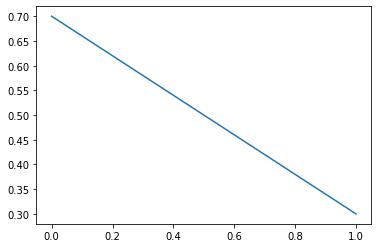

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
x=[0,1]
fx=bernoulli.pmf(x,0.3)
plt.plot(x,fx)

In [ ]:
bernoulli.cdf(x,0.3)

array([0.7, 1. ])

In [ ]:
from scipy.stats import binom
def B_pdf(x,n,p):
  plt.bar(x,binom.pmf(x,n,p))
  plt.title('PDF of Binomial (' + str(n) + ',' + str(p) +')')
def B_cdf(x,n,p):
  plt.bar(x,binom.cdf(x,n,p))
  plt.title('CDF of Binomial (' + str(n) + ',' + str(p) +')')

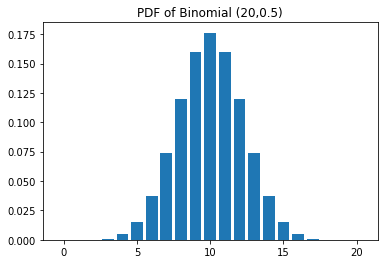

In [ ]:
B_pdf(np.arange(0,21,1),20,0.5)

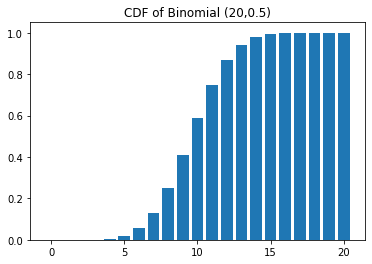

In [ ]:
B_cdf(np.arange(0,21,1),20,0.5)

문제풀이

헌혈 지원자의 80%는 헌혈 가능자라 하자.

⑴5명을 임의 추출했을 때 적어도 두 명이 헌혈 가능한 사람일 확률을 계산하시오.

⑵많아야 4명이 헌혈 가능한 사람일 확률을 구하시오.

x=성공 확률이 p=0.8인 5번의 실험에서 성공(헌혈가능자)의 횟수 ~ B(n=5,p=0.8)

P(X>=2)

In [ ]:
1-binom.cdf(1,5,0.8)

0.99328

P(X<=4)

In [ ]:
binom.cdf(4,5,0.8)

0.6723199999999999

In [ ]:
import scipy.stats as st
def NB_pdf(x,n,p):
  plt.bar(x,st.nbinom.pmf(x,n,p))
  plt.title('PDF of NBinomial (' + str(n) + ',' + str(p) +')')
def NB_cdf(x,n,p):
  plt.bar(x,st.nbinom.cdf(x,n,p))
  plt.title('CDF of NBinomial (' + str(n) + ',' + str(p) +')')

In [ ]:
st.nbinom.pmf(3,4,0.25)

0.03295898437500003

In [ ]:
1-st.nbinom.cdf(2,7,0.25)

0.9986572265625

기계 A가 1시간 동안 오작동 할 확률은 0.02이다. 이 기계가 두 시간 동안 오작동 없이 작동될 확률을 구하시오

In [ ]:
st.nbinom.pmf(0,2,0.02)

0.0004000000000000001

In [ ]:
1-st.nbinom.cdf(0,1,0.02)

0.98

### 04.27.월

In [ ]:
import numpy as np
outcome = np.array([0.68, 0.32])
score = np.array([0.57, 0.16])
sum(outcome * score)

0.4388

In [ ]:
(1-(1-0.05)**30)*30+1

24.56083708171188

p와 n의 함수관계를 설정

n = f(p, k)

In [ ]:
p=0.1
k=10

In [ ]:
n = (1-(1-p)**k)*k+1

In [ ]:
def op(k, p):
  return (1-(1-p)**k)*k+1

In [ ]:
op(10, 0.1)

7.513215599

### 04.13.월

미분하기

In [ ]:
!pip install sympy

1) 원함수 지정

In [ ]:
def f(x):
  return x**3/3-x**2/2-2*x+1/3

2) 미분하기

In [ ]:
from sympy import *
x = Symbol('x')
f = x**3/3-x**2/2-2*x+1/3
f.diff(x)

x**2 - x - 2

In [ ]:
from sympy import *
x = Symbol('x')
f = log(1-2*x)**3
f.diff(x)

-6*log(-2*x + 1)**2/(-2*x + 1)

In [ ]:
from sympy import *
x = Symbol('x')
f = exp(x)/2*x-3
f.diff(x)

x*exp(x)/2 + exp(x)/2

3) 미분함수 지정

In [ ]:
def fp(x):
  return (x**2 - x - 2)

4) 그래프 그리기

4-1) x-정의역 지정

In [ ]:
import numpy as np
x=np.linspace(-3,5,100)
y=np.exp(x)/(2*x-3)

4-2) 원함수 그리기

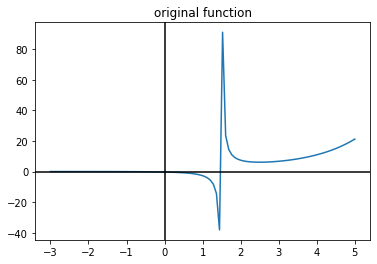

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.axvline(0,c='k')
plt.axhline(0,c='k')
plt.title('original function')
plt.show()

4-3) 미분함수 그리기

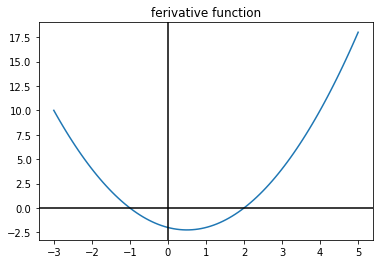

In [ ]:
yp = x**2 - x - 2
plt.plot(x,yp)
plt.title('ferivative function')
plt.axvline(0,c='k')
plt.axhline(0,c='k')
plt.show()

5) 해 구하기

In [ ]:
def f(x):
  return x**3/3-x**2/2-2*x+1/3
from scipy import optimize
optimize.newton(f, 1)

0.16088942931611191

In [ ]:
f(0.16088942931611191)

1.6248113965389166e-13

최대값, 최소값 구하기

In [ ]:
def fp(x):
  return (x**2 - x - 2)
from scipy import optimize
optimize.newton(fp, 1)

2.0

최대값

In [ ]:
f(-1.0)

1.5

최소값

In [ ]:
f(2.0)

-3.0

질량 80kg 바위를 로켓처럼 하늘로 수직으로 쏘아 올렸을 때 시간 t에 도달하는 수직 거리함수를
s(t) = 160t − 16t**2
이다.

(1)가장 높이 올라 갔을 때는 언제인가?

(2)256 높이에서 바위의 속력

In [ ]:
def f(x):
  return 160*x-16*x**2

In [ ]:
from sympy import *
x = Symbol('x')
f = 160*x-16*x**2
f.diff(x)

-32*x + 160

In [ ]:
import numpy as np
x=np.linspace(0,20,100)
y=160*x-16*x**2

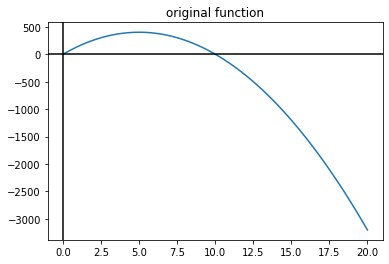

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.axvline(0,c='k')
plt.axhline(0,c='k')
plt.title('original function')
plt.show()

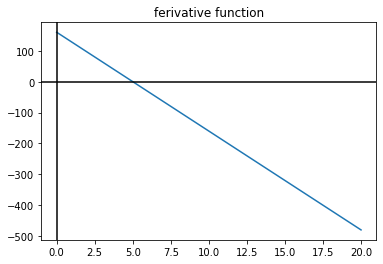

In [ ]:
yp = -32*x + 160
plt.plot(x,yp)
plt.title('ferivative function')
plt.axvline(0,c='k')
plt.axhline(0,c='k')
plt.show()

In [ ]:
def fp(x):
  return -32*x + 160
from scipy import optimize
optimize.newton(fp, 0)

5.0

In [ ]:
fp(5)

0

In [ ]:
import numpy as np
x=np.linspace(0,20,100)
y=160*x-16*x**2-256

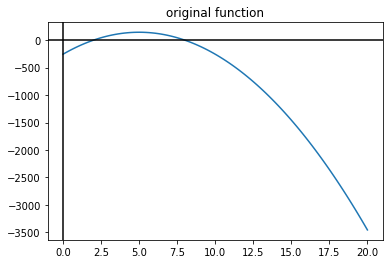

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.axvline(0,c='k')
plt.axhline(0,c='k')
plt.title('original function')
plt.show()

In [ ]:
def f(x):
  return 160*x-16*x**2-256
from scipy import optimize
optimize.newton(f, 2)

2.0

In [ ]:
def f(x):
  return 160*x-16*x**2-256
from scipy import optimize
optimize.newton(f, 8)

8.0

In [ ]:
fp(2)

96

In [ ]:
fp(8)

-96

정원이 60명인 버스승객 수를 x 명이라할때 요금은 p(x) = (3 − x
20 )
2
 (승객당)받는다. 버스가 최대 수익
을 위해서는 승객이 몇 명 탑승해야 하는지 구하시오.

In [ ]:
def f(x):
  return (3-x/20)**2*x

In [ ]:
from sympy import *
x = Symbol('x')
f = (3-x/20)**2*x
f.diff(x)

x*(x/200 - 3/10) + (-x/20 + 3)**2

In [ ]:
def fp(x):
  return x*(x/200 - 3/10) + (-x/20 + 3)**2

In [ ]:
import numpy as np
x=np.linspace(0,60,60)
y=(3-x/20)**2*x

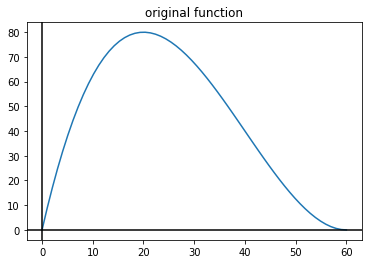

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.axvline(0,c='k')
plt.axhline(0,c='k')
plt.title('original function')
plt.show()

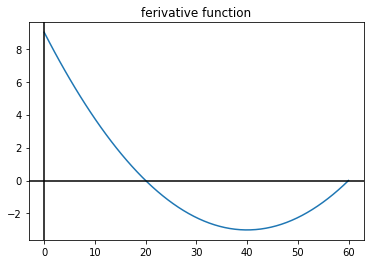

In [ ]:
yp=x*(x/200 - 3/10) + (-x/20 + 3)**2
plt.plot(x,yp)
plt.title('ferivative function')
plt.axvline(0,c='k')
plt.axhline(0,c='k')
plt.show()

In [ ]:
def fp(x):
  return x*(x/200 - 3/10) + (-x/20 + 3)**2
from scipy import optimize
optimize.newton(fp, 20)

20.0

In [ ]:
fp(20)

4.440892098500626e-16

### 04.06.월

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


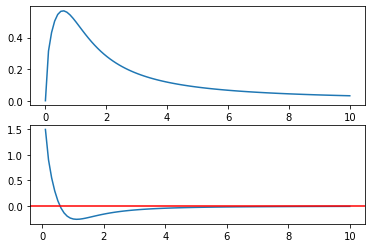

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def fx(x):
  return (x)**(1/2)*(1+x**2)**(-1)  # x=0인 부분 없음
def fp(x):
  return (1-3*x**2)/(2*(x**(1/2))*(1+x**2)**2)
x=np.linspace(0,10,100)
# 기울기가 바뀌는 부분 '변곡점' -> 누적함수 flat
fig, (ax1,ax2)=plt.subplots(2)
ax1.plot(x,fx(x))
ax2.plot(x,fp(x))
plt.axhline(0,c='red')
plt.show()

### 숙제

In [ ]:
def f(x):
  return x**4+x**3-3*x**2-x+2

In [ ]:
from scipy.optimize import brentq, newton
#brentq(f,-3,-2), brentq(f,-2,-1), brentq(f,-1,0), brentq(f,0,1), brentq(f,1,2) #brentq method
newton(f,-2), newton(f,-1), newton(f,0), newton(f,1) #secant method

(-2.0, -1.0, -0.9999999999999998, 1.0)

### 04.01.수

In [ ]:
import numpy as np
x=np.linspace(-2.5,2,100)
y=x**4+x**3-3*x**2-x+2

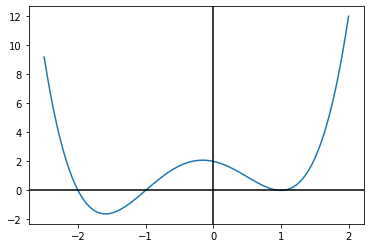

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.axvline(0,c='k')
plt.axhline(0,c='k') # 접점 = 해(근)

### 03.30.월

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#e=2.718
np.exp(1)

2.718281828459045

In [ ]:
n=10000
(1+1/n)**n

2.7181459268249255

In [ ]:
x=np.arange(-10,11)
y=x**2
y

array([100,  81,  64,  49,  36,  25,  16,   9,   4,   1,   0,   1,   4,
         9,  16,  25,  36,  49,  64,  81, 100])

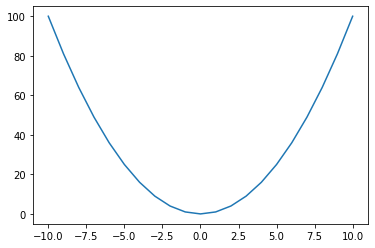

In [ ]:
plt.plot(x,y)

In [ ]:
x=np.arange(-10,5)
y=(4-x)**0.5
y

array([3.74165739, 3.60555128, 3.46410162, 3.31662479, 3.16227766,
       3.        , 2.82842712, 2.64575131, 2.44948974, 2.23606798,
       2.        , 1.73205081, 1.41421356, 1.        , 0.        ])

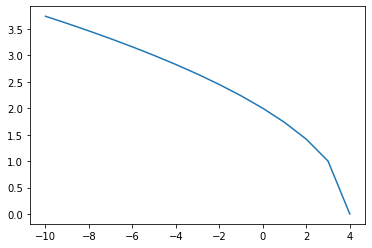

In [ ]:
plt.plot(x,y)

In [ ]:
x=np.arange(-10,10)
y=x**2/(x**2-1)
y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


array([ 1.01010101,  1.0125    ,  1.01587302,  1.02083333,  1.02857143,
        1.04166667,  1.06666667,  1.125     ,  1.33333333,         inf,
       -0.        ,         inf,  1.33333333,  1.125     ,  1.06666667,
        1.04166667,  1.02857143,  1.02083333,  1.01587302,  1.0125    ])

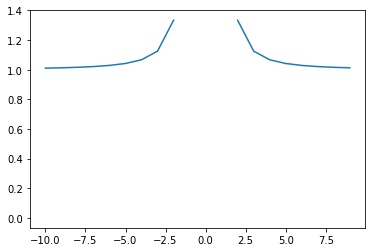

In [ ]:
plt.plot(x,y)

### 03.23.월

In [ ]:
import numpy as np

In [ ]:
np.pi/4

0.7853981633974483

In [ ]:
x=1
y=0
for i in range(3,100,2):
    y=y+1
    if y%2==1:
      x=x-1/i
    else:
      x=x+1/i
print(x)

0.7803986631477527
